# Over Record Transition

147 records - from FHWA's [Data Crosswalk](https://www.fhwa.dot.gov/bridge/snbi/datacrosswalk.cfm)

In [1]:
from civilpy.state.ohio.dot import BridgeObject
import pandas as pd

ImportError: this version of pandas is incompatible with numpy < 1.20.3
your numpy version is 1.19.1.
Please upgrade numpy to >= 1.20.3 to use this pandas version

In [ ]:
fips_codes = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv")

In [ ]:
NBIS_state_codes = {
    '014': 'Alabama', 
    '308': 'Montana',
    '020': 'Alaska', 
    '317': 'Nebraska',
    '049': 'Arizona', 
    '329': 'Nevada',
    '056': 'Arkansas', 
    '331': 'New Hampshire',
    '069': 'Californ', 
    '342': 'New Jersey',
    '088': 'Colorado', 
    '356': 'New Mexico',
    '091': 'Connecti', 
    '362': 'New York',
    '103': 'Delaware', 
    '374': 'North Carolina',
    '113': 'District of Columbia',
    '388': 'North Dakota',
    '124': 'Florida', 
    '395': 'Ohio',
    '134': 'Georgia', 
    '406': 'Oklahoma',
    '159': 'Hawaii', 
    '410': 'Oregon',
    '160': 'Idaho', 
    '423': 'Pennsylvania',
    '175': 'Illinois', 
    '441': 'Rhode Island',
    '185': 'Indiana', 
    '454': 'South Carolina',
    '197': 'Iowa', 
    '468': 'South Dakota',
    '207': 'Kansas', 
    '474': 'Tennessee',
    '214': 'Kentucky', 
    '486': 'Texas',
    '226': 'Louisiana', 
    '498': 'Utah',
    '231': 'Maine', 
    '501': 'Vermont',
    '243': 'Maryland', 
    '513': 'Virginia',
    '251': 'Massachusetts', 
    '530': 'Washington',
    '265': 'Michigan', 
    '543': 'West Virginia',
    '275': 'Minnesota', 
    '555': 'Wisconsin',
    '284': 'Mississippi', 
    '568': 'Wyoming',
    '297': 'Missouri', 
    '721': 'Puerto Rico',
}

In [ ]:
ohio_counties = {
    "ADAMS": "ADA",
    "ALLEN": "ALL",
    "ASHLAND": "ASD",
    "ASHTABULA": "ATB",
    "ATHENS": "ATH",
    "AUGLAIZE": "AUG",
    "BELMONT": "BEL",
    "BROWN": "BRO",
    "BUTLER": "BUT",
    "CARROLL": "CAR",
    "CHAMPAIGN": "CHP",
    "CLARK": "CLA",
    "CLERMONT": "CLE",
    "CLINTON": "CLI",
    "COLUMBIANA": "COL",
    "COSHOCTON": "COS",
    "CRAWFORD": "CRA",
    "CUYAHOGA": "CUY",
    "DARKE": "DAR",
    "DEFIANCE": "DEF",
    "DELAWARE": "DEL",
    "ERIE": "ERI",
    "FAIRFIELD": "FAI",
    "FAYETTE": "FAY",
    "FRANKLIN": "FRA",
    "FULTON": "FUL",
    "GALLIA": "GAL",
    "GEAUGA": "GEA",
    "GREENE": "GRE",
    "GUERNSEY": "GUE",
    "HAMILTON": "HAM",
    "HANCOCK": "HAN",
    "HARDIN": "HAR",
    "HARRISON": "HAS",
    "HENRY": "HEN",
    "HIGHLAND": "HIG",
    "HOCKING": "HOC",
    "HOLMES": "HOL",
    "HURON": "HUR",
    "JACKSON": "JAC",
    "JEFFERSON": "JEF",
    "KNOX": "KNO",
    "LAKE": "LAK",
    "LAWRENCE": "LAW",
    "LICKING": "LIC",
    "LOGAN": "LOG",
    "LORAIN": "LOR",
    "LUCAS": "LUC",
    "MADISON": "MAD",
    "MAHONING": "MAH",
    "MARION": "MAR",
    "MEDINA": "MED",
    "MEIGS": "MEG",
    "MERCER": "MER",
    "MIAMI": "MIA",
    "MONROE": "MOE",
    "MONTGOMERY": "MOT",
    "MORGAN": "MRG",
    "MORROW": "MRW",
    "MUSKINGUM": "MUS",
    "NOBLE": "NOB",
    "OTTAWA": "OTT",
    "PAULDING": "PAU",
    "PERRY": "PER",
    "PICKAWAY": "PIC",
    "PIKE": "PIK",
    "PORTAGE": "POR",
    "PREBLE": "PRE",
    "PUTNAM": "PUT",
    "RICHLAND": "RIC",
    "ROSS": "ROS",
    "SANDUSKY": "SAN",
    "SCIOTO": "SCI",
    "SENECA": "SEN",
    "SHELBY": "SHE",
    "STARK": "STA",
    "SUMMIT": "SUM",
    "TRUMBULL": "TRU",
    "TUSCARAWAS": "TUS",
    "UNION": "UNI",
    "VAN WERT": "VAN",
    "VINTON": "VIN",
    "WARREN": "WAR",
    "WASHINGTON": "WAS",
    "WAYNE": "WAY",
    "WILLIAMS": "WIL",
    "WOOD": "WOO",
    "WYANDOT": "WYA",
}

In [ ]:
test_bridge_list = ['6500609', '7704232']

# //TODO - The first three SFN values don't work with historic data lookups in the NBIS
# Bad Values: '1739573', '7338597', '0101893', '0544353', '3402665'

# Configuration options (sets parameters to determine state preferences for certain decisions)
leading_zeros_user_input = 0 # Affects multiple conversions (BID01, BID03, ...)
state_user_input = 'Ohio'

In [ ]:
first_bridge = BridgeObject(int(test_bridge_list[0]))

## Loading historic data

In [ ]:
NBI_df = pd.read_csv("G:\\ref\\New folder\\2022_NBI_All_States.csv", low_memory=False)
ohio_bridges = NBI_df[NBI_df['STATE_CODE_001'] == 39]
first_bridge_NBI = ohio_bridges[ohio_bridges['STRUCTURE_NUMBER_008'] == test_bridge_list[0].rjust(15, ' ')]

# Description of Notebook

The above code imports the civilpy package for use in exploring bridge objects. The list of test bridges are randomly selected for testing functions throughout, but any bridge can be specified by changing the SFN used to initate the `first_bridge` object above. Each function ideally takes in the old value and returns an updated, converted value if possible. Sections are defined by their SNBI ID and Item Name. For data types, AN means "AlphaNumeric".

## B.ID.01 - Bridge Number

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (15)      |  AN (15)     | Trim leading and trailing spaces.  For Transition Tool, provide option to trim or not trim leading zeroes, or to trim all but one leading zero; do not provide a default selection.  Ask user whether to apply this selection to transitioned legacy (historical) data for that State/Agency.  (Add a note stating that all legacy data will also be preserved in its original form.)  For those who do not use the Transition Tool, we will need to survey. |

In [ ]:
name_length = len(str(first_bridge.raw_data['Structure File Number'])) + 1 # Gets the length of the original bridge id

print(f'Former NBI value: [{first_bridge_NBI["STRUCTURE_NUMBER_008"].iloc[0]}]')

def bridge_number_conversion(bridge_number, leading_zeros=0):
    """
    Takes in a bridge number and config value:
    
    0 - Do not Pad (default)
    1 - Pad number w/ single zero? 
    2 - Pad w/ 0s to 15 
    
    returns converted value
    """
    
    if leading_zeros == 0:
        updated_value = f"{bridge_number}"
    elif leading_zeros == 1:
        updated_value = f"{str(bridge_number).zfill(name_length)}"
    elif leading_zeros == 2:
        updated_value = f"{str(bridge_number).zfill(15)}"
    
    return updated_value

print(f'Converted  value: [{bridge_number_conversion(first_bridge.raw_data["Structure File Number"], leading_zeros_user_input)}]')

## B.ID.02 - Bridge Name

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (300)      |  N/A        |                                |

This is a previously non-existant value.

## B.ID.03 - Previous Bridge Number

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (15)      |  AN (15)     | Populate this field using the history of structure number changes that resides in the NBI from Structure Number Change submittals.  Trim leading and trailing spaces and leading zeroes in accordance with the user's selection for Item B.ID.01 |

//TODO - Depends on structure change submittal histories, not sure where existing values are kept.

## B.L.01 - State Code

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (2, 0)     |  3/N         | Trim leading zero, drop 3rd digit |

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["STATE_CODE_001"].iloc[0]}]')

def state_code_conversion(bridge_number, state):
    """
    Takes in a bridge number, returns converted state code from index lookup

    returns converted value, since this is written for Ohio, 39
    """

    state_code = str(int([i for i in NBIS_state_codes if NBIS_state_codes[i]==state][0][:2]))
    return state_code

print(f'Converted  value: [{state_code_conversion(test_bridge_list[0], state_user_input)}]')

# note -Bentley database doesn't seem to have a 'state' field

## B.L.02 - County Code

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,0)      |  3/N         |  Direct Transition             |

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["COUNTY_CODE_003"].iloc[0]}]')

def get_county_code(bridge_number, state):
    """
    Takes in bridge SFN, returns FIPS County Code, 
    
    //TODO - Use geocoding spatial joints with GPS coords to verify bentley value against 
    result from geocoding library (verify county codes)
    
    //TODO - Make function not specific to Ohio by replacing "OH" below with appropriate dict
    
    returns: 3 character numeric county code
    """
    # Uses a list comprehesion to go through counties and match full name with county code in database
    county = [k for k, v in ohio_counties.items() if v == first_bridge.raw_data['County Code']][0]
    county = county.capitalize() + ' County'

    # Builds a list of Fips codes by county, filtered by the state
    ohio_fips_codes = fips_codes[fips_codes['state'] == "OH"]
    
    bridge_fips_code = str(fips_codes[fips_codes['name'] == county]['fips'].iloc[0])[2:]
    
    return int(bridge_fips_code)

print(f'Converted  value: [{get_county_code(test_bridge_list[0], state_user_input)}]')

## B.L.03 - Place Code

[Place Code Data Download](https://www.census.gov/library/reference/code-lists/ansi.html#place)

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (5,0)      |  5/N         |                                |

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["PLACE_CODE_004"].iloc[0]}]')

def convert_place_code():
    """
    NOTE: There is no coversion here, the SNBI update still uses FIPS Place codes, but those aren't readable
    so here's how to convert them, it also checks for bad values.
    
    Takes in bridge SFN, returns FIPS County Code location conversion, 
    
    //TODO - Download FIPS definitions for various states, currently configured for only Ohio
    
    returns: Human readable version of 5 digit fips code
    """
    # //TODO - Find a better way to convert these values
    place_codes = pd.read_csv("G:\\ref\\New folder\\FIPS_places_oh.txt", sep='|')
    
    readable_name = place_codes[place_codes['Place'] == int(first_bridge.raw_data['FIPS Number'])]
    
    if place_codes[place_codes['Place'] == int(first_bridge.raw_data['FIPS Number'])].empty:
        print("\nError, Place value not found in conversion data, double check the value")
        print("Is a legitimate entry in the FIPS 'place code' system\n")
    else:
        return readable_name
    

print(f'Converted  value: [{convert_place_code()}]')

## B.L.04 - Highway Agency District

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  2/AN        |      Trim leading zeroes.      |

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["HIGHWAY_DISTRICT_002"].iloc[0]}]')   
print(f'Converted  value: [{first_bridge_NBI["HIGHWAY_DISTRICT_002"].iloc[0]}] (No Change)')

## B.L.05 - Latitude

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N(9,6)       |  8/N        | Convert to decimal degrees  from degrees/minutes/seconds.  Add negative if Item 1 = 60.	Jarvis Island in the U.S. Minor Outlying Islands also has a negative latitude, but there are currently no bridges for that island in the NBI. |

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["LAT_016"].iloc[0]}]')


def convert_latitudinal_values(latitude):
    """
    Takes a Longitude in degree minutes seconds, converts it to decimal, prints an error if it's not in North
    America
    
    return: converted value
    """
    latitude_deg = int(str(latitude)[:2])
    latitude_min = int(str(latitude)[2:4]) / 60
    latitude_sec = (int(str(latitude)[4:]) / 100) / 3600
    
    converted_value = latitude_deg + latitude_min + latitude_sec
    
    if latitude_deg > 55 or latitude_deg < 16:
        print("Latitude outside the range of continental US, check values")

    return converted_value
    
print(f'Updated value: [{convert_latitudinal_values(first_bridge.raw_data["Latitude"]):.6f}]')

## B.L.06 - Longitude

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N(10,6)      |  9/N        | Convert to decimal degrees  from degrees/minutes/seconds.  Add negative for all records except if Item 1 = 64, 66, 68, 69, or 70.	Wake Island in the U.S. Minor Outlying Islands also has a positive longitude, but there are currently no bridges for that island in the NBI.  Additionally, some portions of Alaska have a positive longitude, but there are currently no bridges for those areas in the NBI. |

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["LONG_017"].iloc[0]}]') # Currently in DD°MM'SS.SS"

def convert_longitudinal_values(longitude):
    """
    Takes a Longitude in degree minutes seconds, converts it to decimal, prints an error if it's not in North
    America
    
    return: converted value
    """
    longitude_deg = int(str(longitude)[:2])
    longitude_min = int(str(longitude)[2:4]) / 60
    longitude_sec = (int(str(longitude)[4:]) / 100) / 3600
    
    if longitude_deg + longitude_min + longitude_sec > 0:
        print("\nValues are supposed to be negative, performing conversion, but database needs corrected\n")
        converted_value = -1 * (longitude_deg + longitude_min + longitude_sec)
    else:
        converted_value = longitude_deg + longitude_min + longitude_sec
    
    if converted_value > 0 or converted_value < -180:
        print("\nLongitude outside the range of continental US, check values, should be negative\n")

    return converted_value

print(f'Updated value: [{convert_longitudinal_values(first_bridge.raw_data["Longitude"]):.6f}]')

## B.L.07 - Border Bridge Number

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (15)      |  (15)/AN     | Trim leading and trailing spaces and leading zeroes. |	

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["OTHR_STATE_STRUC_NO_099"].iloc[0]}]')

print(f'Updated value: [{first_bridge.raw_data["BTRS Link Number"]}]') # Verify this is the right field, potentially clean transition if so

## B.L.08 - Border Bridge State or Country Code

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  3/AN        | Trim leading zero, drop 3rd digit, change CAN to CA, MEX to MX. |

//TODO - Wasn't immediately clear where this was in Bentley's System

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["OTHER_STATE_CODE_098A"].iloc[0]}]')

## B.L.09 - Border Bridge Inspection Responsibility

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  2/N         | See tab.  Coding Guide uses FUNDING responsibility.	Transition assumes that funding responsibility and inspection responsibility are the same.  Agencies will need to update in accordance with FHWA implementation timeline. |

//TODO Need to determine exactly how these values are coded, old values can be brought forward, but not sure how they're related to the

```
'Maintenance Responsibility Code': 1.0,
'Maintenance Responsibility Description calc': 'Unknown',
'Maintenance Responsibility plus Null calc': 1.0,
```

values currently in the database

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["OTHER_STATE_PCNT_098B"].iloc[0]}]')

print(f'Updated value: [{first_bridge.raw_data["Maintenance Responsibility Description calc"]}]') # Verify this is the right field, potentially clean transition if so

## B.L.10 - Border Bridge Designated Lead State

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (2,0)      |  3/N         | Trim leading zero, drop 3rd digit.	Both bordering States are designated as Lead States for transition.  Agencies will need to update in accordance with FHWA implementation timeline. |

In [ ]:
print(f'Former NBI value: [{first_bridge_NBI["STATE_CODE_001"].iloc[0]}]')
print(f'Updated value: [{first_bridge_NBI["STATE_CODE_001"].iloc[0]}]')

## B.L.11 - Bridge Location

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (300)     |  25/AN       | Direct transition.	           |

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['LOCATION_009'].iloc[0]}]")
print(f"Updated value: [{first_bridge_NBI['LOCATION_009'].iloc[0]}]")

## B.L.12 - Metropolitan Planning Organization

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (300)     |  NA          | Didn't Previously exist        |

Previously non-existing entry

## B.CL.01 - Owner

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (4)       |  2/N         |  See tab.                      |

    22	Owner

// TODO - Lots of these comments have "See Tab" on them, what exactly is the tab?

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

## B.CL.02 - Maintenance Responsibility

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (4)       |  2/N         |  See tab.                      |

    21	Maintenance Responsibility

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['MAINTENANCE_021'].iloc[0]}]")

## B.CL.03	- Federal or Tribal Land Access

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (5)       |  1/N	      |  See tab.                      |

    105	Federal Lands Highway

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['FEDERAL_LANDS_105'].iloc[0]}]")

## B.CL.04	- Historic Significance

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N	      |  Partial	See tab.	Contains temporary codes to be phased out.                     |

    37	Historical Significance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['HISTORY_037'].iloc[0]}]")

## B.CL.05 - Toll

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N	      |  See tab.                      |

	20	Toll		

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['TOLL_020'].iloc[0]}]")

## B.CL.06 - Emergency Evacuation Designation

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  N/A	      |  Vague, no comments just says "not a clean transition" |

## B.SP.01 - Span Configuration Designation

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  3/N - 3/N	      |  Partial	See tab.   Item 43 data will partially transition to a main or culvert span configuration data set.  Item 44 data when present will partially transition to an approach or culvert span configuration data set.  SNBI culvert extension and widening span configurations cannot be transitioned.  Multiple main span or approach span configurations cannot be transitioned.                      |

    43/44	Structure Type, Main / Structure Types, Approach Spans

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_KIND_043A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_TYPE_043B'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['APPR_KIND_044A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['APPR_TYPE_044B'].iloc[0]}]")

## B.SP.02 - Number of Spans					

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (5)       |  3/N - 4/N   |  Partial	Use Item 45 value for M01 or C01, use Item 46 value for A01 or C02.  SNBI culvert extension and widening span configurations cannot be transitioned.  Multiple main span or approach span configurations cannot be transitioned.                      |

    45/46	Number of Spans in Main Unit / Number of Approach Spans

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['MAIN_UNIT_SPANS_045'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['APPR_SPANS_046'].iloc[0]}]")

## B.SP.03 - Number of Beam Lines

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,0)      |  NA	      |  No comments, just 'no' under clean transition |

## B.SP.04 - Span Material				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  1/N - 1/N   |  Partial See tab.  Use Item 43A value for M01 or C01, use Item 44A value for A01 or C02.	Contains temporary codes to be phased out.                      |

    43A/44A	Structure Type, Main / Structure Types, Approach Spans

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_KIND_043A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['APPR_KIND_044A'].iloc[0]}]") 

## B.SP.05 - Span Continuity

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  3/N - 3/N   | Partial	See tab.  Use Item 43A/B value for M01 or C01, use Item 44A/B value for A01 or C02.	Contains temporary codes to be phased out. |

    43/44	Structure Type, Main / Structure Types, Approach Spans

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_KIND_043A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_TYPE_043B'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['APPR_KIND_044A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['APPR_TYPE_044B'].iloc[0]}]")

## B.SP.06 - Span Type				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  2/N - 2/N	  | Partial	See tab.  Use Item 43B value for M01 or C01, use Item 44B value for A01 or C02.	Contains temporary codes to be phased out.  335 bridge records currently have 44B = 20. |

    43B/44B	Structure Type, Main / Structure Types, Approach Spans

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_TYPE_043B'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['APPR_TYPE_044B'].iloc[0]}]")

## B.SP.07 - Span Protective System

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  NA	      |  No comments, just 'No' under clean transition |


## B.SP.08 - Deck Interaction

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  1/N	      | No comments, just 'No' under clean transition  |


## B.SP.09 - Deck Material and Type

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  1/AN	      |  Partial	See tab.  Use for all span sets.	Contains temporary codes to be phased out. |

    107	Deck Structure Type

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['DECK_STRUCTURE_TYPE_107'].iloc[0]}]")

## B.SP.10 - Wearing Surface				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  1/AN	      |  Partial	See tab.  Use for all span sets.  Also reference Item 107.	Contains temporary codes to be phased out. |

    108A Type of Wearing Surface

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['SURFACE_TYPE_108A'].iloc[0]}]")

## B.SP.11 - Deck Protective System				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  1/AN	      | Partial	See tab.  Use for all span sets.  Also reference Item 107.	Contains temporary codes to be phased out. |

    108B - Type of Membrane

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['MEMBRANE_TYPE_108B'].iloc[0]}]")

## B.SP.12 - Deck Reinforcing Protective System	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  1/AN	      | Partial	See tab.  Use for all span sets.  Also reference Item 107.	Contains temporary codes to be phased out. |

    108C Deck Protection	

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['DECK_PROTECTION_108C'].iloc[0]}]")

## B.SP.13 - Deck Stay-In-Place Forms

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  NA	      |  Just "No" under clean transition |

//TODO - Determine what to do with all non-clean transitions

## B.SB.01 - Substructure Configuration Designation

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA	      |  No                      |


## B.SB.02 - Number of Substructure Units

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,0)      |  NA	      |  No	                           |


## B.SB.03 - Substructure Material

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  1/N	      |  No                            |


## B.SB.04 - Substructure Type

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  1/N	      | No                             |


## B.SB.05 - Substructure Protective System

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA 	      |  No                            |


## B.SB.06 - Foundation Type

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA	      |  No	                           |


## B.SB.07 - Foundation Protective System

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA 	      |  No	                           |

//TODO - Determine what to do with all non-clean transitions

## B.RH.01 - Bridge Railings				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (4)       |  1/AN 	      |  Partial	See tab.	Contains temporary codes to be phased out. |

    36A	Traffic Safety Features

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['RAILINGS_036A'].iloc[0]}]")

## B.RH.02 - Transitions

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (4)       |  1/AN 	      | Partial	See tab.	Contains temporary codes to be phased out. |

    36B	Traffic Safety Features		

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['TRANSITIONS_036B'].iloc[0]}]")

## B.G.01 - NBIS Bridge Length

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (7,1)      |  6/N 	      | Partial	Convert from metric to nearest tenth of a foot when Item 49 is greater than 9.1 meters.  Otherwise no value.	Bridge lengths near 20 feet must be field-measured to ensure accuracy. |

    49	Structure Length

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_LEN_MT_049'].iloc[0]}]")

## B.G.02 - Total Bridge Length					

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (7,1)      |  6/N	      | Yes	Convert from metric to nearest tenth of a foot. |

    49	Structure Length

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['STRUCTURE_LEN_MT_049'].iloc[0]}]")

## B.G.03 - Maximum Span Length

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (5,1)       |  5/N 	      |  Yes	Convert from metric to nearest tenth of a foot. |

    48	Length of Maximum Span

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['MAX_SPAN_LEN_MT_048'].iloc[0]}]")

## B.G.04 - Minimum Span Length

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (5,1)      |  5/N 	      | Partial	Convert from metric to nearest tenth of a foot if Item 45 = 1 and Item 46 = 0.   Otherwise, no value. |

    48	Length of Maximum Span

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['MAX_SPAN_LEN_MT_048'].iloc[0]}]")

## B.G.05 - Bridge Width Out-to-Out

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,1)      |  4/N 	      | Yes	Convert from metric to nearest tenth of a foot.  Null when Item 52 = 0.	TPM must continue to use Approach Roadway Width for deck area calculations. |

    52	Deck Width, Out-to-Out

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['DECK_WIDTH_MT_052'].iloc[0]}]")

## B.G.06 - Bridge Width Curb-to-Curb	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,1)      |  4/N 	      | Yes	Convert from metric to nearest tenth of a foot.	|

    51	Bridge Roadway Width, Curb-to-Curb

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['ROADWAY_WIDTH_MT_051'].iloc[0]}]")

## B.G.07	BG07	Left Curb or Sidewalk Width	N (3,1)	50A	Left curb or sidewalk width	3/N	Yes	Convert from metric to nearest tenth of a foot.	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA 	      |  No	                           |

## B.G.08 - Right Curb or Sidewalk Width

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      |  3/N 	      | Yes	Convert from metric to nearest tenth of a foot. |

    50B	Right curb or sidewalk width

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['RIGHT_CURB_MT_050B'].iloc[0]}]")

## B.G.09 - Approach Roadway Width	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,1)      |  4/N	      | Yes	Convert from metric to nearest tenth of a foot.	|

    32	Approach Roadway Width

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['APPR_WIDTH_MT_032'].iloc[0]}]")

## B.G.10 - Bridge Median	

				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N 	      | Yes	Direct transition.         |

    33	Bridge Median

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['APPR_WIDTH_MT_032'].iloc[0]}]")

## B.G.11 - Skew

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (2,0)      |  2/N 	      | Yes	Direct transition.	For bridges with multiple and different skew angles Coding Guide reports average and SNBI reports maximum.  Agencies will need to update in accordance with FHWA implementation timeline. |

    34	Skew

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['DEGREES_SKEW_034'].iloc[0]}]")

## B.G.12 - Curved Bridge	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  N/A 	      |  No	                           |

## B.G.13 - Maximum Bridge Height	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,0)      |  NA 	      |  No	                           |

## B.G.14 - Sidehill Bridge

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.G.15 - Irregular Deck Area	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (10,1)     |  NA 	      |  No	                           |

## B.G.16 - Calculated Deck Area

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (10,1)     |  NA 	      | Calculate Multiply Item 49 by Item 52 when Item 52 > 0.  Otherwise multiply Item 49 by Item 32.  Convert from metric to nearest tenth of a square foot. |

## B.F.01 - Feature Type

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  2/N 	      |  Yes	See tab.               |

    42A/42B	Type of Service

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['SERVICE_ON_042A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['SERVICE_UND_042B'].iloc[0]}]")

## B.F.02 - Feature Location

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  2/N	      |  Yes	See tab.               |

    42A/42B	Type of Service

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['SERVICE_ON_042A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['SERVICE_UND_042B'].iloc[0]}]")

## B.F.03 - Feature Name

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (300)     | 24/AN - 18/AN | Yes	See tab.	           |

    6A/7	Features Intersected / Facility Carried by Structure

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['FEATURES_DESC_006A'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['FACILITY_CARRIED_007'].iloc[0]}]")

## B.RT.01 - Route Designation

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA 	      | Yes	R01.  Assign to H01 feature. |

## B.RT.02 - Route Number

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (15)      | 5/AN - 1/N   | Yes	Trim leading zeroes.  Append Item 5D with Item 5E - see tab.  Use 0 for values that do not contain other digits.  Assign to R01 route on H01 feature.	Examples:  If 5D = 00035 and 5E = W, B.RT.02 = 35W.  If 5D = 00000, B.RT.02 = 0. |

    5D/5E	Route Number / Directional Suffix

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['ROUTE_NUMBER_005D'].iloc[0]}]")
print(f"Former NBI value: [{first_bridge_NBI['DIRECTION_005E'].iloc[0]}]")

## B.RT.03 - Route Direction

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  1/N	      | Partial	See tab.  Assign to R01 route on H01 feature.	Contains temporary codes to be phased out. |

    102	Direction of Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.RT.04 - Route Type

				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N 	      | Yes	Direct transition except 8 goes to X.  Assign to R01 route on H01 feature. |

    5B	Route Signing Prefix

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.RT.05 - Service Type	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N 	      | Yes	Direct transition except 0 goes to X.  Assign to R01 route on H01 feature.|

    5C	Designated Level of Service

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.01 - Functional Classification	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  2/N	      | Partial	See tab.  Assign to H01 feature.	Contains temporary codes to be phased out. |

    26	Functional Classification of Inventory Route

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.02 - Urban Code

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (5)       |  2/N	      | Partial	See tab.  Assign to all H features.	Contains temporary codes to be phased out. |

    26	Functional Classification of Inventory Route

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.03 - NHS Designation	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N 	      | Yes	See tab.  Assign to H01 feature. |

    104	Highway System of the Inventory Route

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.04 - National Highway Freight Network

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N 	      | Partial	See tab.  Assign to H01 feature. Contains temporary codes to be phased out. |

    110	Designated National Network

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.05 - STRAHNET Designation

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N	      | Yes	See tab. Assign to H01 feature. |

    100	STRAHNET Highway Designation

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.06 - LRS Route ID

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (120)     |  10/AN - 2/N | Partial	Assign to H01 feature.  Eliminate all values that reduce to 0.  Trim leading zeroes and spaces.  Combine 13A and 13B into a 12 character (or shorter) string.	Applies to Highway.  This transition will work for most States. The exceptions are New Jersey where their 13A and HPMS Route IDs have leading zeros and Wyoming where 13B portions were not in their HPMS Route ID. |

    13A/13B	LRS Inventory Route, Subroute Number

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.07 - LRS Mile Point	

//TODO - Determine what `Assign to H01 feature.` is referring to.

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  7/N (7,3)   | Yes	Convert from metric to nearest thousandth of a mile.  Assign to H01 feature. |

    11	Kilometerpoint

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.08 - Lanes on Highway	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (2,0)      |  2/N	      | Yes Direct transition.  Assign to H01 feature. |

    28A	Lanes on Structure

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.09 - Annual Average Daily Traffic	

				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (8,0)      |  6/N	      | Yes	Direct transition.  Trim leading zeroes.  Assign to H01 feature. |

    29	Average Daily Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.10 - Annual Average Daily Truck Traffic	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (8,0)      |  2/N	      | Yes	Multiply Item 109 (percentage) by Item 29.  Assign to H01 feature.	 |

    109	Average Daily Truck Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.11 - Year of Annual Average Daily Traffic

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,0)      |  4/N	      | Yes	Direct transition.  Assign to H01 feature. |

    30	Year of Average Daily Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.12 - Highway Maximum Usable Vertical Clearance	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      |  4/N	      | Yes	Convert from metric to nearest tenth of a foot (round down).  Use 99.9 for values of 30 meters or greater.  Assign to H01 feature. |

    10	Inventory Route, Minimum Vertical Clearance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.13 - Highway Minimum Vertical Clearance	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      | 4/N - 1/AN - 4/N | Yes	Convert from metric to nearest tenth of a foot (round down).<br>Use 99.9 for values of 30 meters or greater.<br>Assign Item 53 value to H01 feature (carried).<br>Assign Item 54B value to H02 feature (below) when Item 54A = H.<br>Otherwise no value for highway features below the bridge. |

    53/54A/54B	Minimum Vertical Clearance Over Bridge Roadway / Reference Feature / Minimum Vertical Underclearance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.14 - Highway Minimum Horizontal Clearance, Left	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      | 1/AN - 3/N   | Yes	Convert from metric to nearest tenth of a foot (round down).  No value when Item 56 = 99.9 meters.  Otherwise use 99.9 when Item 56 = 30 meters or greater.   Assign Item 56 value to H02 feature (below) when Item 55A = H.  Otherwise no value for highway features below the bridge.	 |

    55A/56	Reference Feature / Minimum Lateral Underclearance on Left

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.15 - Highway Minimum Horizontal Clearance, Right

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      |  1/AN - 3/N  | Yes	Convert from metric to nearest tenth of a foot (round down).  Use 99.9 when Item 55B = 30 meters or greater.  Assign Item 55B value to H02 feature (below) when Item 55A = H.  Otherwise no value for highway features below the bridge. |

    55A/55B	Reference Feature / Minimum Lateral Underclearance on Right

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.16 - Highway Maximum Usable Surface Width	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      | 3/N	      |  Yes Convert from metric to nearest tenth of a foot (round down).  Use 99.9 for values of 30 meters or greater.  Assign to H01 feature. |

    47	Inventory Route, Total Horizontal Clearance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.17 - Bypass Detour Length

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,0)      |  3/N	      | Yes	199 converts to 999.  Otherwise convert from metric to nearest mile.   Assign to H01 feature. |

    19	Bypass, Detour Length

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.18 - Crossing Bridge Number

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (15)      |  NA 	      |  No	                           |

## B.RR.01 - Railroad Service 

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  NA 	      |  No	                           |

## B.RR.02 - Railroad Minimum Vertical Clearance

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      | 1/AN - 4/N   | Yes	"Convert from metric to nearest tenth of a foot (round down).  Use 99.9 for values of 30 meters or greater.  Use Item 54B value only when Item 54A = R.  Otherwise no value for railroad features below the bridge.<br><br>Assign value to R01 feature (below) when Item 42a ><4.<br>Assign value to R02 feature (below) when Item 42a =4."	|

    54A/54B	Reference Feature / Minimum Vertical Underclearance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.RR.03 - Railroad Minimum Horizontal Offest	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| 1/AN         |  3/N	      | Yes, Convert from metric to nearest tenth of a foot (round down).  Use 99.9 when Item 55B = 30 meters or greater.    Use Item 55B value only when Item 55A = R.  Otherwise no value for railroad features below the bridge.<br><br>Assign value to R01 feature (below) when Item 42a ><4.<br>Assign value to R02 feature (below) when Item 42a =4. |

    55A/55B	Reference Feature / Minimum Lateral Underclearance on Right

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.N.01 - Navigable Waterway	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 1/AN	      | Partial	See tab.  Assign value to W01 feature. |

    38	Navigation Control

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.N.02 - Navigation Minimum Vertical Clearance	

			
|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,1)      | 4/N - 2/N - 4/N | Yes, See tab.  Convert from metric to nearest tenth of a foot (round down).  Assign value to W01 feature only if Item 38 = 1.  Otherwise no value. |

    39/43B/116	Navigation Vertical Clearance / Type of Design/Construction / Minimum Navigation Vertical Clearance Vertical Lift Bridge

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.N.03 - Movable Bridge Maximum Navigation Vertical Clearance

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,1)      | 4/N - 2/N    | Yes	Convert Item 39 from metric to nearest tenth of a foot (round down).  Assign value to W01 feature only if Item 43B = 15 and Item 38 = 1.  Otherwise no value. |

    39/43B	Navigation Vertical Clearance / Type of Design/Construction

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.N.04 - Navigation Channel Width

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (5,1)      |  5/N	      | Yes	Convert from metric to nearest tenth of a foot (round down).  Assign value to W01 feature only if Item 38 = 1.  Otherwise no value. |

    40	Navigation Horizontal Clearance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.N.05 - Navigation Channel Minimum Horizontal Clearance

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (5,1)       |  NA 	      |  No	                           |

## B.N.06 - Substructure Navigation Protection

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N	      | Partial	See tab.  Assign value to W01 feature only if Item 38 = 1.  Otherwise no value.	Contains temporary codes to be phased out. |

    111	Pier or Abutment Protection (for Navigation)

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.LR.01 - Design Load

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (8)       |  1/N 	      | Yes	See tab.                   |

    31	Design Load

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.LR.02 - Design Method	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (4)       |  NA 	      |  No	                           |

## B.LR.03 - Load Rating Date

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     |  NA 	      |  No	                           |

## B.LR.04 - Load Rating Method	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (4)       | 1/N - 1/N    | Yes See tab. Using OR method and assuming IR method is the same. |

    63	Method Used To Determine Operating Rating

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.LR.05 - Inventory Load Rating Factor	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,2)      |  3/N	      |  Yes	"If Item 65 = 6, 7, 8, D, E, F, do the following:<br>For submittal file, direct transition.<br>For transition of legacy data, divide by 32.4.<br><br>If Item 65 has a value other than 6, 7, 8, D, E, or F, divide by 32.67."https://www.fhwa.dot.gov/bridge/032204.cfm |

    66	Inventory Rating

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.LR.06 - Operating Load Rating Factor

	 		 

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,2)      |  3/N      | Yes, "If Item 63 = 6, 7, 8, D, E, F, do the following:<br>For submittal file, direct transition.<br>For transition of legacy data, divide by 32.4.<br><br>If Item 63 has a value other than 6, 7, 8, D, E, or F,  divide by 32.67."	https://www.fhwa.dot.gov/bridge/032204.cfm |

    64	Operating Rating

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.LR.07 - Controlling Legal Load Rating Factor	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,2)      |  NA 	      |  No	                           |

## B.LR.08 - Routine Permit Loads	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.PS.01 - Load Posting Status

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  1/AN	      | Partial	See tab. Contains temporary codes to be phased out. |

    41	Structure Open, Posted, or Closed to Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.PS.02 - Posting Status Change Date

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     |  NA 	      |  No	                           |

## B.EP.01 - Legal Load Configuration

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA 	      |  No	                           |

## B.EP.02 - Legal Load Rating Factor	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,2)      |  NA 	      |  No	                           |

## B.EP.03 - Posting Type

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.EP.04 - Posting Value 

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (2,0)      |  NA 	      |  No	                           |

## B.IR.01 - NSTM Inspection Required

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  3/AN	      | Yes	Direct transition.         |

    92A	Critical Feature Inspection- Fracture Critical Details

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.IR.02 - Fatigue Details

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.IR.03 - Underwater Inspection Required	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  3/AN        | Yes	Direct transition.	       |

    92B	Critical Feature Inspection - Underwater Inspection

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.IR.04 - Complex Feature

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.IE.01 - Inspection Type

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 4/N - 3/AN - 4/AN | Partial See tab           |

    90/92/93	Inspection Date / Critical Feature Inspection / Critical Feature Inspection Date

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.IE.02 - Inspection Begin Date

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     | 4/N - 4/AN   | Partial	See tab.               |

    90/93	Inspection Date / Critical Feature Inspection Date

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.IE.03 - Inspection Completion Date

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     |  NA 	      |  No	                           |

## B.IE.04 - Nationally Certified Bridge Inspector	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (15)      |  NA 	      |  No	                           |

## B.IE.05 - Inspection Interval	

				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (2,0)      | 2/N - 3/AN   | Partial	See tab.               |

    91/92	Designated Inspection Frequency / Critical Feature Inspection

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.IE.06 - Inspection Due Date	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     |  NA 	      |  No	                           |

## B.IE.07 - Risk-Based Inspection Interval Method	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.IE.08 - Inspection Quality Control Date

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     |  NA 	      |  No	                           |

## B.IE.09 - Inspection Quality Assurance Date	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     |  NA 	      |  No	                           |

## B.IE.10 - Inspection Data Update Date

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| YYYYMMDD     |  NA 	      |  No	                           |

## B.IE.11 - Inspection Note

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (300)     |  NA 	      |  No	                           |

## B.IE.12 - Inspection Equipment

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (120)     |  NA 	      |  No	                           |

## B.C.01 - Deck Condition Rating	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN	      |  Yes	Direct transition.	   |

    58	Deck

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.02 - Superstructure Condition Rating	


			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
|  AN (1)      |  1/AN  	  | Yes	Direct transition.	       |

    59	Superstructure

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.03 - Substructure Condition Rating				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 1/AN         |  Yes	Direct transition.	   |

    60	Substructure

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.04 - Culvert Condition Rating	

				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN        |  Yes	Direct transition.     |

    62	Culvert

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.05 - Bridge Railing Condition Rating

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN	      | Partial	Direct transition if N. Otherwise no value. |

    36A	Bridge railings

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.06 - Bridge Railing Transitions Condition Rating	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN	      | Partial Direct transition if N. Otherwise no value. |

    36B	Transitions

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.07 - Bridge Bearings Condition Rating

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.C.08 - Bridge Joints Condition Rating

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.C.09 - Channel Condition Rating	

				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN	      | Yes	Direct transition.         |

    61	Channel and Channel Protetion

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.10 - Channel Protection Condition Rating	


|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.C.11 - Scour Condition Rating

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 1/AN	      | Partial	See tab. Contains temporary codes to be phased out. |

    113	Scour Critical Bridges

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.12 - Bridge Condition Classification

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN        | Yes	Direct transition.         |

    CAT10	Bridge Condition

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.13 - Lowest Condition Rating Code	

				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 1/N	      | Yes	Direct transition.         |

    CAT23 Lowest Condition Code

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.C.14 - NSTM Inspection Condition

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.C.15 - Underwater Inspection Condition

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.AP.01 - Approach Roadway Alignment

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN        |  Yes	See tab.                   |

    72	Approach Roadway Alignment

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.AP.02 - Overtopping Likelihood

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN	      | Partial	See tab. Contains temporary codes to be phased out. |

    71	Waterway Adequacy

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.AP.03 - Scour Vulnerability

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/AN 	      | Partial	See tab. Contains temporary codes to be phased out. |

    113	Scour Critical Bridges

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.AP.04 - Scour Plan of Action

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.AP.05	- Seismic Vulnerability

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  NA 	      |  No	                           |

## B.W.01 - Year Built			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,0)       |  4/N 	      |  Yes Direct transition.        |

    27	Year Built

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.W.02 - Year Work Performed

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,0)      |  4/N	      | Yes	Direct transition if > 0. Otherwise no value. |

    106	Year Reconstructed

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.W.03 - Work Performed			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (120)     |  4/N	      | Partial	"RECONSTRUCTED" if > 0.  Otherwise no value. "RECONSTRUCTED is not an SNBI code for this item.  Users may update this value at a later date. |

    106	Year Reconstructed

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

# Under Records

## B.F.01 - Feature Type	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  2/N	      | Yes, H02 Applies to (Highway) Feature |

    42A/42B	Type of Service

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.F.02 - Feature Location

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  2/N	      | Yes B Applies to (Highway) Feature |

    42A/42B	Type of Service

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.F.03 - Feature Name				

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (300)     | 24/AN - 18/AN | Yes Straight transition.  The "under" record value for this item takes precedence over the "over" record value when an "under" record exists.	Applies to (Highway) Feature |

    6A	Features Intersected

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.RT.01 - Route Designation	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (3)       |  NA 	      | Yes	R01.  Assign to H02 feature. Applies to Route. |

## B.RT.02 - Route Number

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (15)      | 5/AN - 1/N   | Yes	Trim leading zeroes.  Append Item 5D with Item 5E - see tab.  Use 0 for values that do not contain other digits.  Assign to R01 Route on H02 Feature.	Applies to Route.  Examples:  If 5D = 00035 and 5E = W, B.RT.02 = 35W.  If 5D = 00000, B.RT.02 = 0. |

    5D/5E - Route Number / Directional Suffix

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.RT.03 - Route Direction

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (2)       |  1/N	      | Partial	See tab.  Assign to R01 Route on H02 Feature. Applies to Route |

    102	Direction of Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.RT.04 - Route Type

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 1/N	      | Yes	Direct transition except 8 goes to X.  Assign to R01 Route on H02 Feature.	Applies to Route |

    5B	Route Signing Prefix

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.RT.05 - Service Type	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N	      | Yes	Direct transition except 0 goes to X.  Assign to R01 Route on H02 Feature.	Applies to Route |

    5C	Designated Level of Service

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.01 - Functional Classification

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 2/N	      | Yes	See tab.  Assign to H02 feature. Applies to Highway |

    26	Functional Classification of Inventory Route

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.02 - Urban Code

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (5)       |  2/N	      | Partial	See tab.  Assign to all H features.	Applies to Highway |

    26	Functional Classification of Inventory Route

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.03 - NHS Designation	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N	      | Yes	See tab. Assign to H02 feature. Applies to Highway |

## B.H.04 - National Highway Freight Network	

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       |  1/N	      | Partial	See tab.  Assign to H02 feature. Applies to Highway |

    110	Designated National Network	

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.05 - STRAHNET Designation		

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (1)       | 1/N	      | Yes	See tab. Assign to H02 feature. Applies to Highway |

    100	STRAHNET Highway Designation

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.06 - LRS Route ID

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| AN (120)     | 10/AN - 2/N | Partial	Assign to H02 feature.  Eliminate all values that reduce to 0.  Trim leading zeroes and spaces.  Combine 13A and 13B into a 12 character (or shorter) string.	Applies to Highway.  This transition will work for most States. The exceptions are New Jersey where their 13A and HPMS Route IDs have leading zeros and Wyoming where 13B portions were not in their HPMS Route ID. |

    13A/13B	LRS Inventory Route, Subroute Number

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.07 - LRS Mile Point

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (8,3)      | 7/N (7,3)    | Yes	Convert from metric to nearest tenth of a foot. Assign to H02 feature. Applies to Highway |

    11	Kilometerpoint

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.08 - Lanes on Highway

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (2,0)      | 2/N 	      | Yes	Direct transition. Assign to H02 feature. Applies to Highway |

     28B	Lanes Under Structure

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.09 - Annual Average Daily Traffic

		

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (8,0)      |  6/N         | Yes	Direct transition. Trim leading zeroes. Assign to H02 feature. Applies to Highway |

    29	Average Daily Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.10 - Annual Average Daily Truck Traffic	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (8,0)      | 2/N	      | Yes	Multiply Item 109 (percentage) by Item 29.  Assign to H02 feature.	Applies to Highway |

    109	Average Daily Truck Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.11 - Year of Annual Average Daily Traffic

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (4,0)      |  4/N	      | Yes	Direct transition. Assign to H02 feature. Applies to Highway |

    30	Year of Average Daily Traffic

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.12 - Highway Maximum Usable Vertical Clearance

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N(3,1)       |  4/N  	      | Yes	Convert from metric to nearest tenth of a foot. Use 99.9 for values of 30 meters or greater. Assign to H02 feature. Applies to Highway |

    10	Inventory Route, Minimum Vertical Clearance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.16	BH16	Highway Maximum Usable Surface Width	

			

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,1)      | 3/N 	      | Yes, Convert from metric to nearest tenth of a foot (round down). Use 99.9 for values of 30 meters or greater. Assign to H02 feature. Applies to Highway |

    47	Inventory Route, Total Horizontal Clearance

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

## B.H.17 - Bypass Detour Length

|  SNBI Format |  1995 Format |  Comments                      |
|:------------:|:------------:|:------------------------------:|
| N (3,0)      |  3/N	      | Yes	199 converts to 999. Otherwise convert from metric to nearest tenth of a foot. Assign to H02 feature. Applies to Highway |

    19	Bypass, Detour Length

In [ ]:
print(f"Former NBI value: [{first_bridge_NBI['OWNER_022'].iloc[0]}]")

list(first_bridge_NBI.keys())

# Appendix Data and Definitions

In [ ]:
first_bridge.raw_data

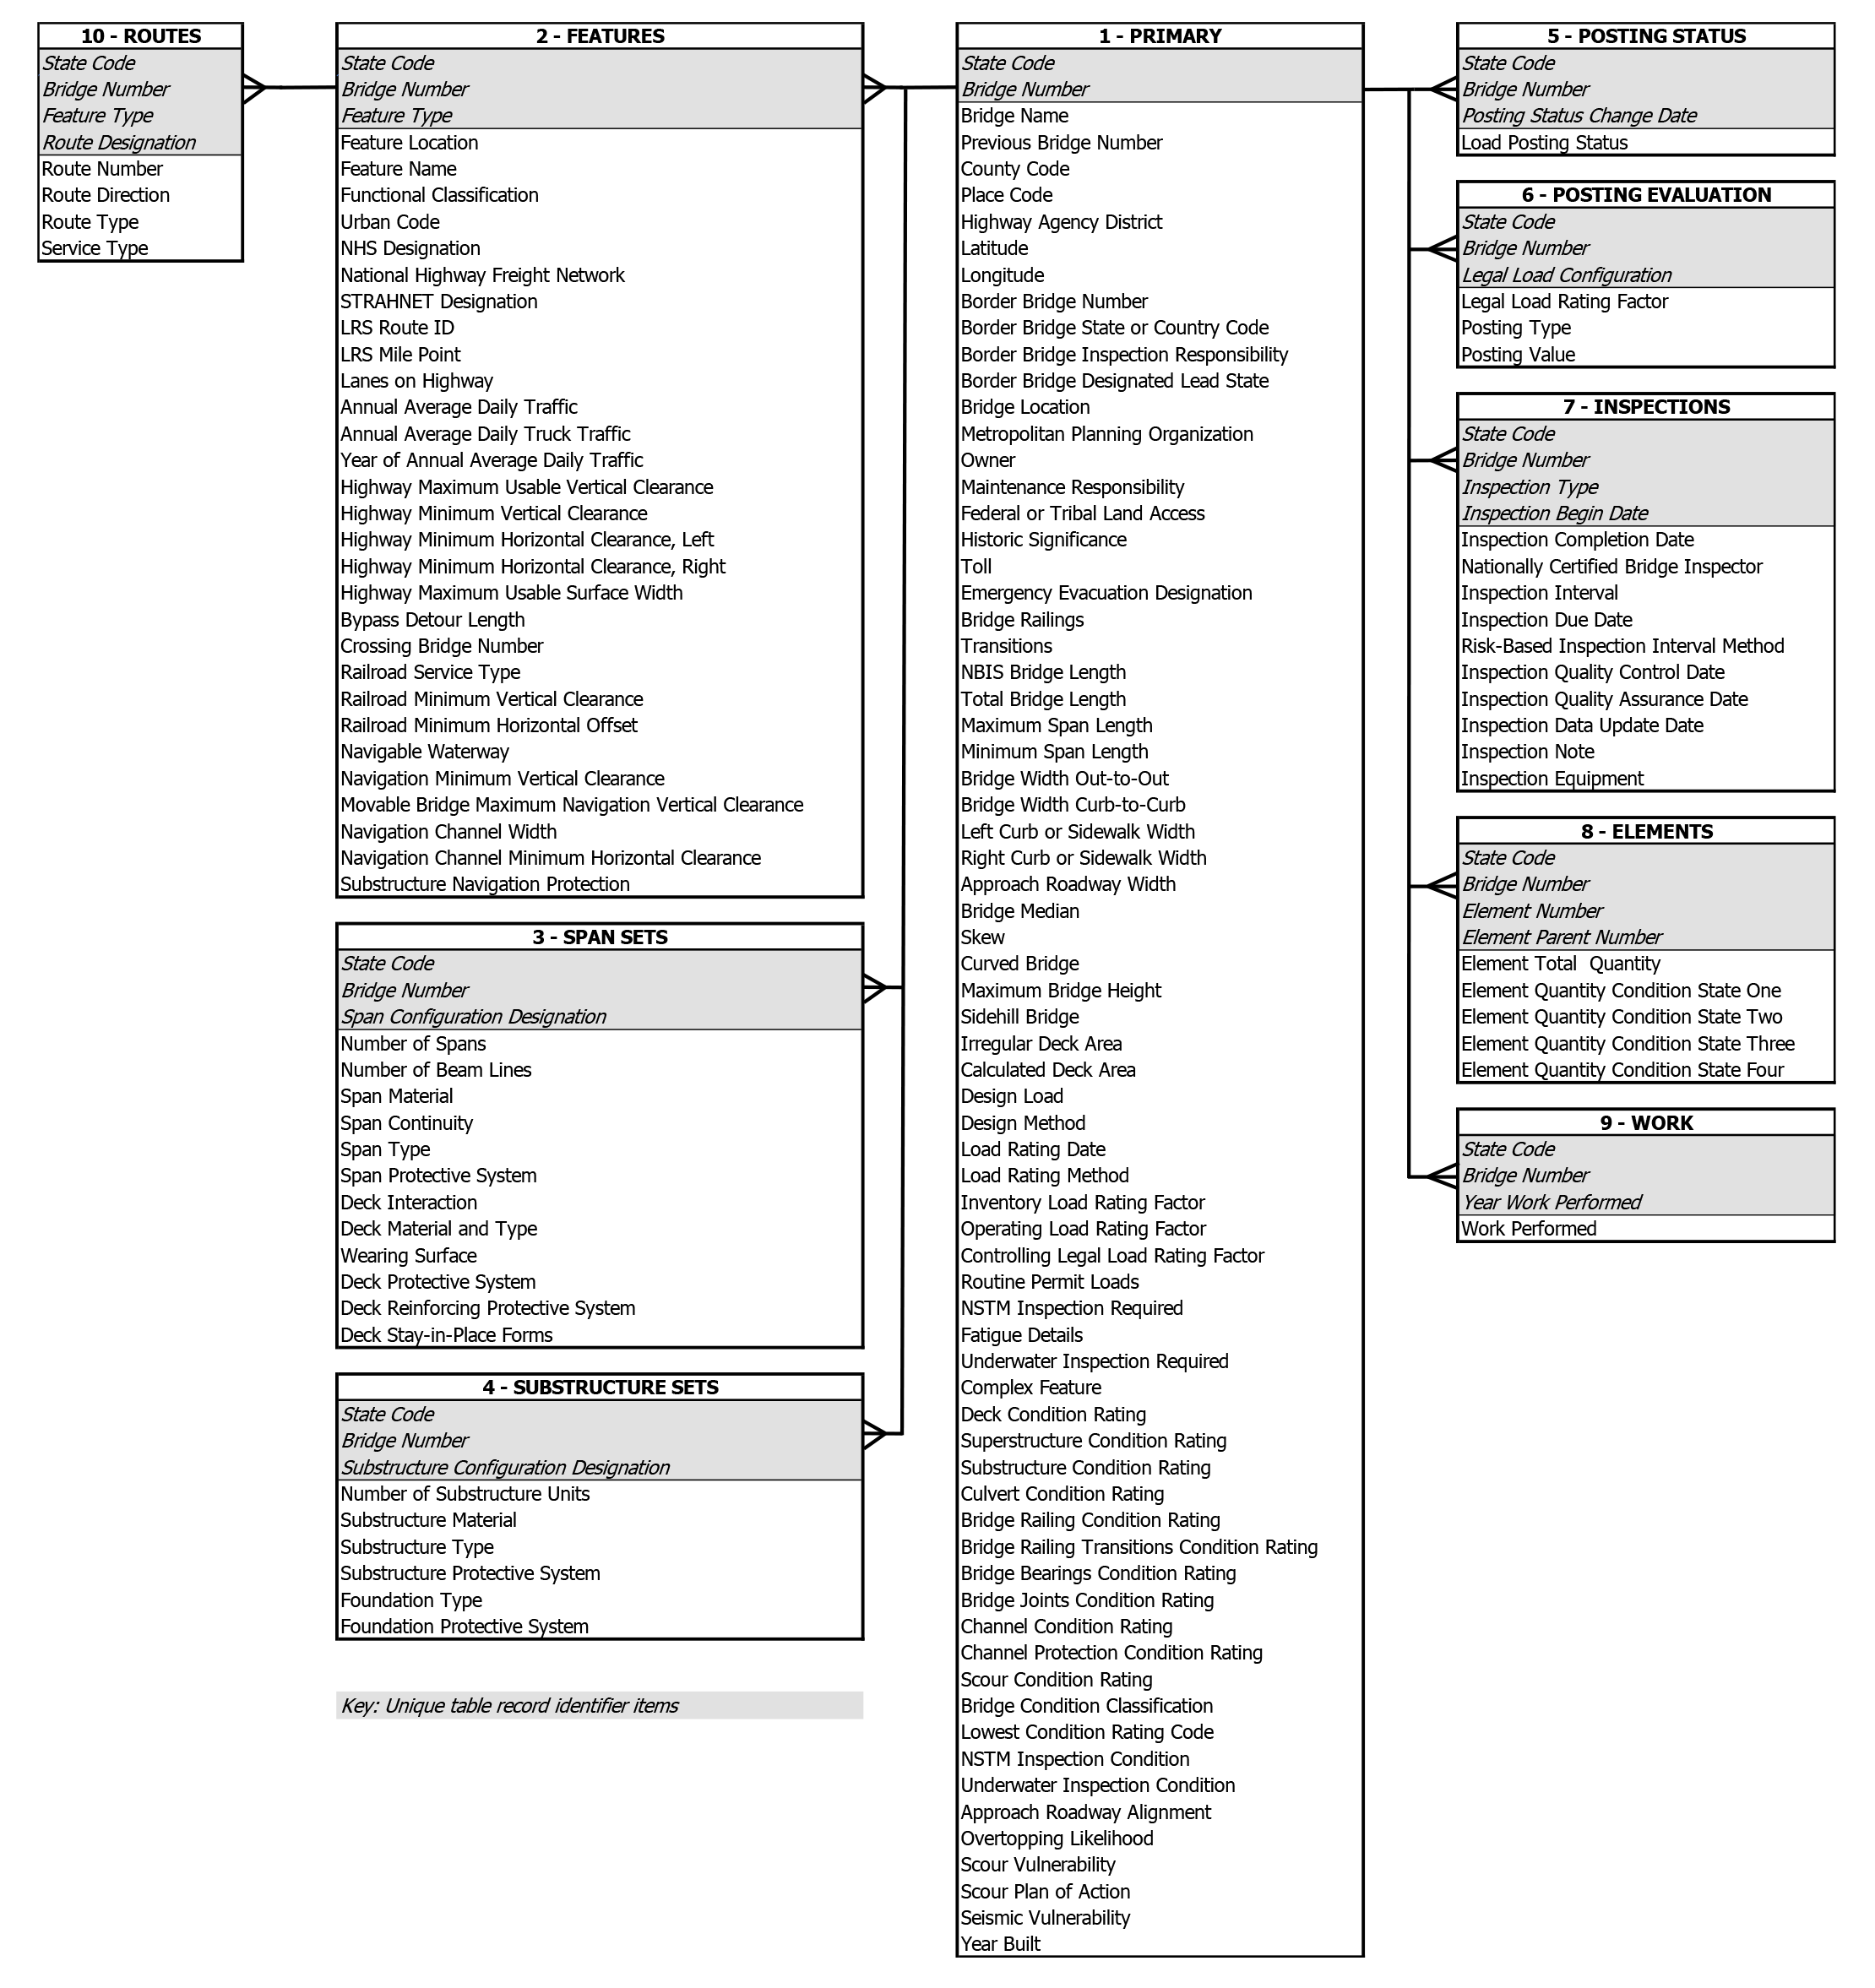